<a href="https://colab.research.google.com/github/PrashanthGVSS/End-to-End-Sales-Analysis-and-Prediction-Using-Python-and-Machine-Learning-Techniques/blob/main/BlinkIT_grocery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/BlinkIT Grocery Data.csv')

In [4]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [7]:
print(df.isnull().sum())

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64


In [8]:
df.dropna(inplace=True)

In [10]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


In [14]:
df['Item Weight'].fillna(df['Item Weight'].mean(), inplace=True)

In [15]:
df.drop_duplicates(inplace=True)

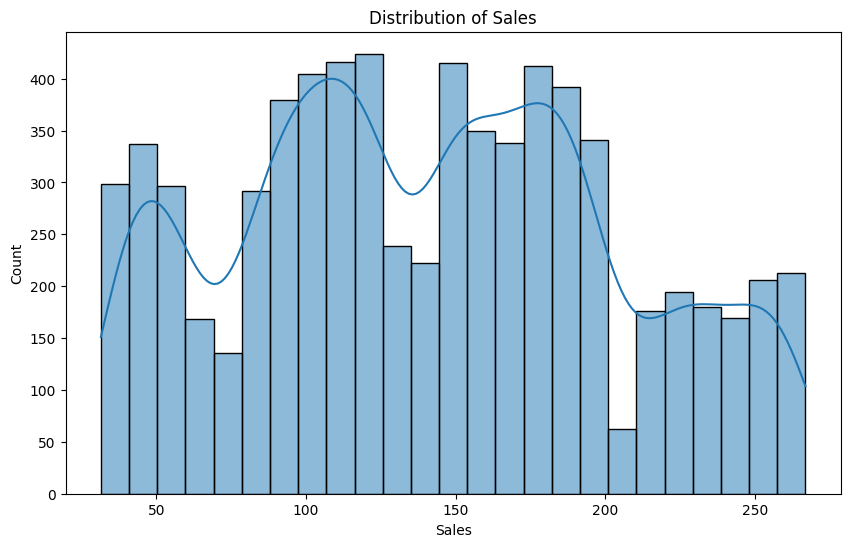

In [13]:
# Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

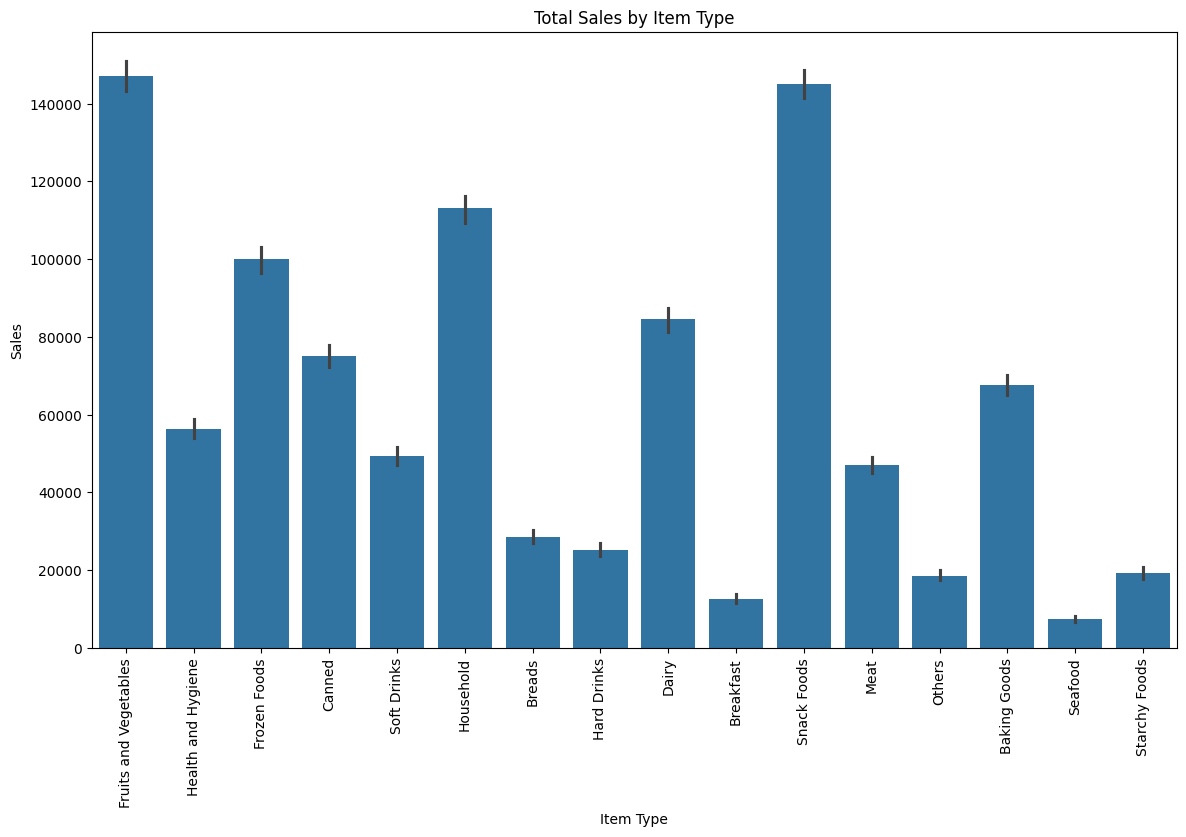

In [16]:
# Sales by Item Type
plt.figure(figsize=(14, 8))
sns.barplot(x='Item Type', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by Item Type')
plt.xticks(rotation=90)
plt.show()

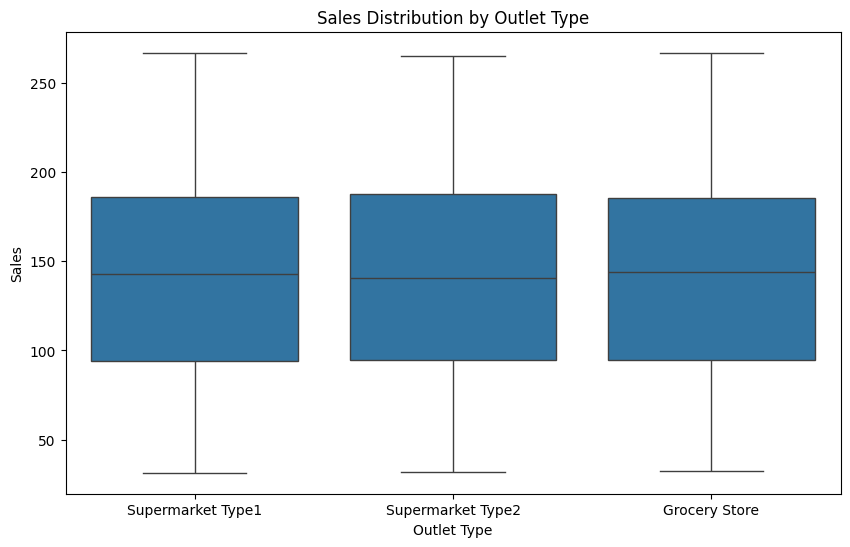

In [17]:
# Sales by Outlet Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet Type', y='Sales', data=df)
plt.title('Sales Distribution by Outlet Type')
plt.show()

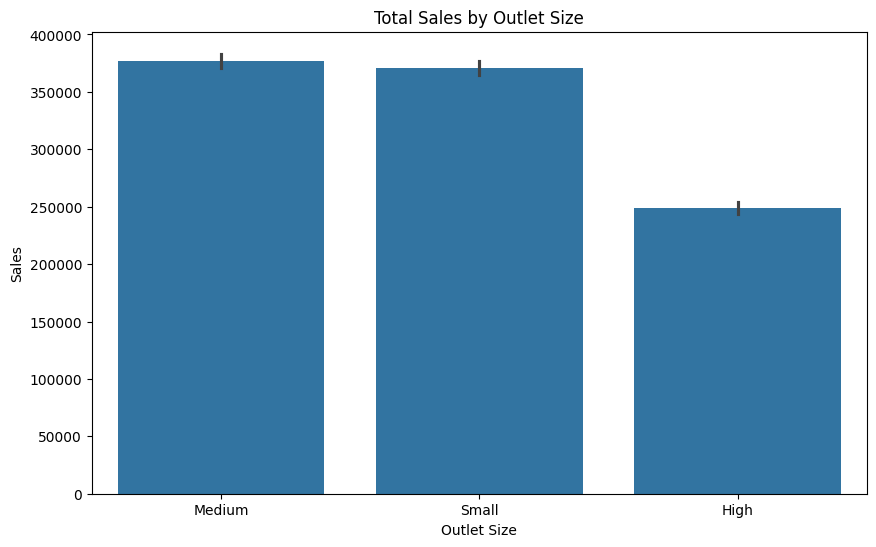

In [18]:
# Sales by Outlet Size
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet Size', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by Outlet Size')
plt.show()

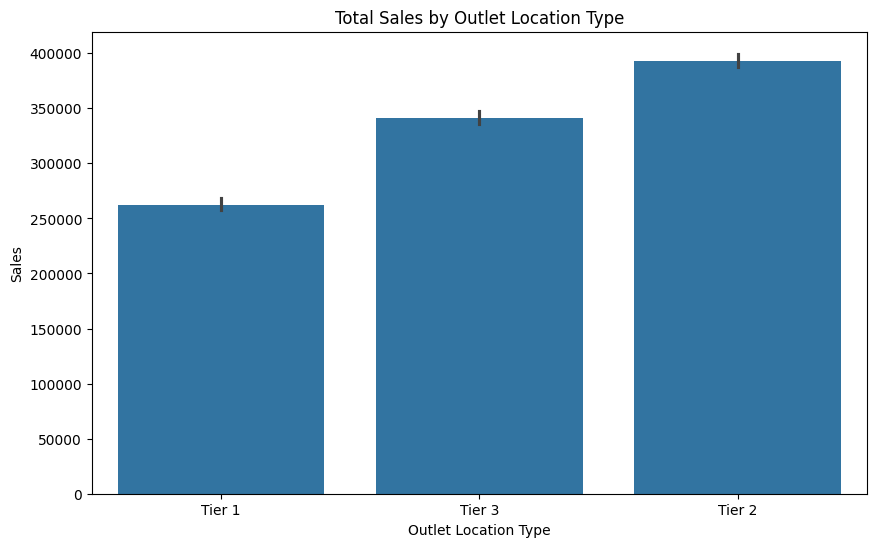

In [19]:
# Sales by Outlet Location Type
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet Location Type', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by Outlet Location Type')
plt.show()

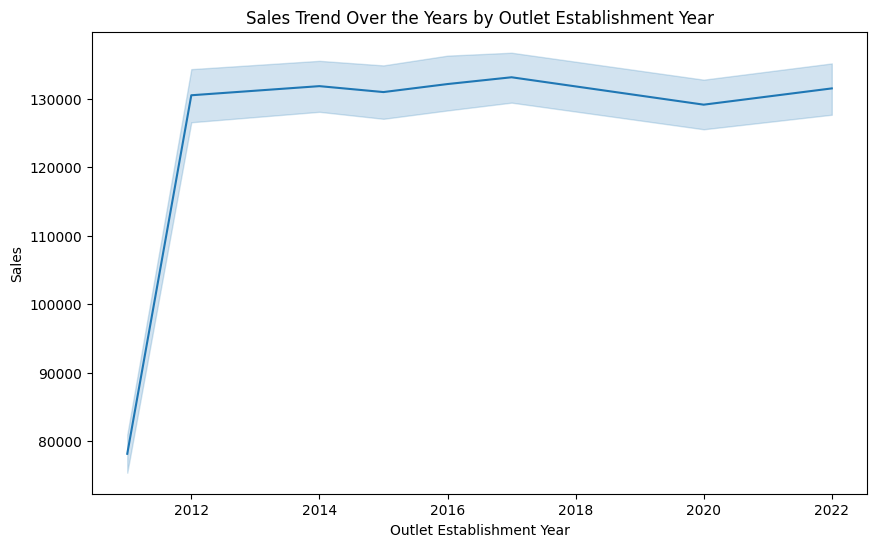

In [20]:
# Sales trends over the years based on outlet establishment
plt.figure(figsize=(10, 6))
sns.lineplot(x='Outlet Establishment Year', y='Sales', data=df, estimator='sum')
plt.title('Sales Trend Over the Years by Outlet Establishment Year')
plt.show()

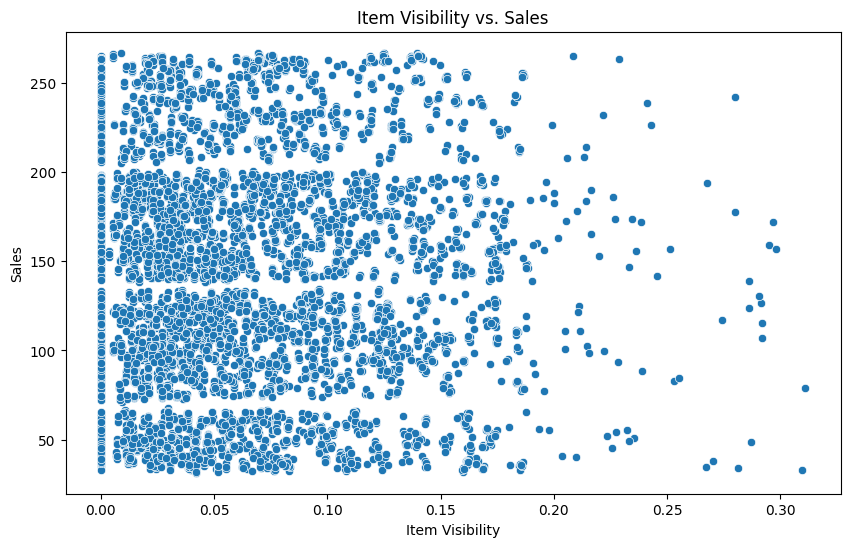

In [21]:
# Scatter plot of Item Visibility vs. Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item Visibility', y='Sales', data=df)
plt.title('Item Visibility vs. Sales')
plt.show()

In [22]:
# Correlation between Item Visibility and Sales
correlation = df['Item Visibility'].corr(df['Sales'])
print(f'Correlation between Item Visibility and Sales: {correlation}')

Correlation between Item Visibility and Sales: -0.006061288780331987


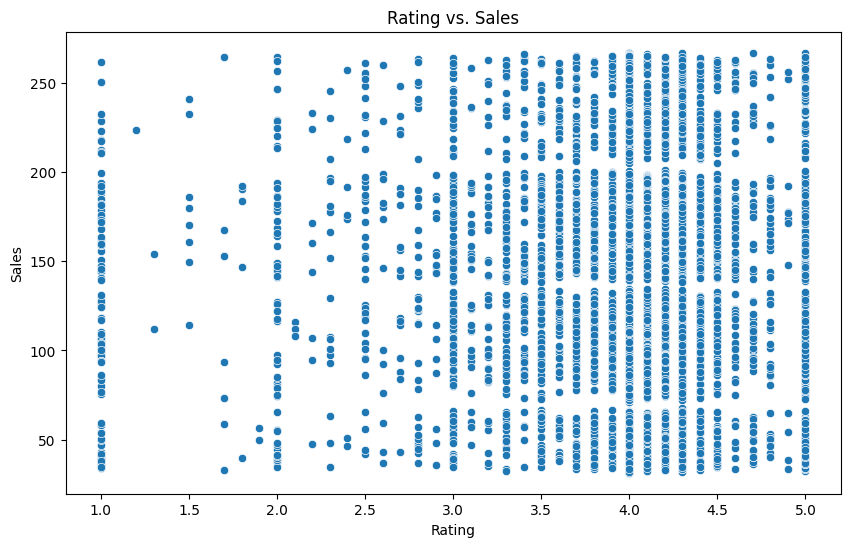

In [23]:
# Scatter plot of Rating vs. Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Sales', data=df)
plt.title('Rating vs. Sales')
plt.show()

In [24]:
# Correlation between Rating and Sales
rating_correlation = df['Rating'].corr(df['Sales'])
print(f'Correlation between Rating and Sales: {rating_correlation}')

Correlation between Rating and Sales: 0.00918604555560926


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
label_encoders = {}
for column in ['Item Fat Content', 'Item Type', 'Outlet Identifier', 'Outlet Location Type', 'Outlet Size', 'Outlet Type']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target variable
X = df.drop(columns=['Sales', 'Item Identifier'])
y = df['Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features (optional but recommended for algorithms like SVM, KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the models
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.2f}, R^2 Score: {r2:.2f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Linear Regression - Mean Squared Error: 3899.11, R^2 Score: -0.00
Decision Tree - Mean Squared Error: 2380.29, R^2 Score: 0.39
Random Forest - Mean Squared Error: 1571.22, R^2 Score: 0.60


In [29]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

evaluate_model(y_test, y_pred_best_rf, "Tuned Random Forest")


Tuned Random Forest - Mean Squared Error: 1645.60, R^2 Score: 0.58
